In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading the updated data so not to run the above cells
df_aldi = pd.read_csv('datasets/updated_data/updated_All_Data_Aldi.csv')

df_aldi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6009058 entries, 0 to 6009057
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   supermarket      object 
 1   price            float64
 2   per_unit_price   float64
 3   unit             object 
 4   names            object 
 5   date             object 
 6   category         object 
 7   own_brand        bool   
 8   Week             int64  
 9   Quantity         int64  
 10  Revenue          float64
 11  day_of_week_num  int64  
 12  week_of_month    int64  
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 555.9+ MB


In [2]:
# columns to be copied into a new dataframe
columnstoCopy_aldi = ['date', 'category', 'Revenue', 'day_of_week_num', 'week_of_month']
aldiSub_data = df_aldi[columnstoCopy_aldi].copy()

In [3]:

categories = [
    'meat_poultry_fish', 'other_food_cupboard', 'frozen', 'other_fresh_food', 
    'other_drinks', 'bakery', 'vegetables', 'cooking_essentials', 'fruits', 
    'other_household', 'pantry_staples', 'alcoholic_beverages', 'cold_beverages', 
    'personal_care', 'cleaning_supplies', 'pets', 'other_health_products', 
    'breakfast_items', 'baby_products', 'hot_beverages', 'free-from', 
    'medication', 'kitchen_essentials', 'coffee_and_tea_related'
]

# Defining a custom mapping dictionary
customMapping = {
    'meat_poultry_fish': 1,
    'other_food_cupboard': 2,
    'frozen': 3,
    'other_fresh_food': 4,
    'other_drinks': 5,
    'bakery': 6,
    'vegetables': 7,
    'cooking_essentials': 8,
    'fruits': 9,
    'other_household': 10,
    'pantry_staples': 11,
    'alcoholic_beverages': 12,
    'cold_beverages': 13,
    'personal_care': 14,
    'cleaning_supplies': 15,
    'pets': 16,
    'other_health_products': 17,
    'breakfast_items': 18,
    'baby_products': 19,
    'hot_beverages': 20,
    'free-from': 21,
    'medication': 22,
    'kitchen_essentials': 23,
    'coffee_and_tea_related': 24
}

# Applying custom mapping to categories
categoryNumericalCustom = [customMapping[cat] for cat in categories]

# Overwriting the content within the category column (changing from string to numerical)
aldiSub_data['category'] = aldiSub_data['category'].map(customMapping)

# Checking to see if the changes have been made
aldiSub_data.head()

,date,category,Revenue,day_of_week_num,week_of_month
0,2024-04-13,19,18.54,5,2
1,2024-04-13,19,21.63,5,2
2,2024-04-13,19,21.63,5,2
3,2024-04-13,19,15.45,5,2
4,2024-04-13,19,21.63,5,2


In [4]:
aldiSub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6009058 entries, 0 to 6009057
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date             object 
 1   category         int64  
 2   Revenue          float64
 3   day_of_week_num  int64  
 4   week_of_month    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 229.2+ MB


In [5]:
# Ensure 'date' is a datetime object
aldiSub_data['date'] = pd.to_datetime(aldiSub_data['date'])

# Sort DataFrame by 'date'
aldiSub_data.sort_values('date', inplace=True)

# sin and cosine components
aldiSub_data['sin_day'] = np.sin(2*np.pi*aldiSub_data['day_of_week_num']/7)
aldiSub_data['cos_day'] = np.cos(2*np.pi*aldiSub_data['day_of_week_num']/7)

# sine and cosine for week of the month
aldiSub_data['sin_week'] = np.sin(2*np.pi*aldiSub_data['week_of_month']/4)
aldiSub_data['cos_week'] = np.cos(2*np.pi*aldiSub_data['week_of_month']/4)

# Calculate the number of days since each category was last seen
aldiSub_data['Last_Seen_Days'] = aldiSub_data.groupby('category')['date'].transform(lambda x: x.diff().dt.days)

# Display the DataFrame
aldiSub_data.head()

,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days
6009057,2024-01-09,16,2.34,1,2,0.781831,0.62349,1.224647e-16,-1.0,NaN
5967555,2024-01-09,20,69.93,1,2,0.781831,0.62349,1.224647e-16,-1.0,NaN
5967554,2024-01-09,20,69.93,1,2,0.781831,0.62349,1.224647e-16,-1.0,0.0
5967553,2024-01-09,20,49.95,1,2,0.781831,0.62349,1.224647e-16,-1.0,0.0
5967552,2024-01-09,20,49.95,1,2,0.781831,0.62349,1.224647e-16,-1.0,0.0


In [6]:
aldiSub_data.dropna(inplace=True)
aldiSub_data['Last_Seen_Days'].value_counts()

Last_Seen_Days
0.0    6006863
1.0       2086
2.0         61
3.0         24
Name: count, dtype: int64

In [7]:
# Creating lags
aldiSub_data.sort_values('date', inplace=True)  # Sort data by date if not already sorted
#aldiSub_data.set_index('date', inplace=True)
aldiSub_data.sort_index(inplace=True) 
#aldiSub_data.set_index('date', inplace=True)  # Set 'date' as index if you want to use date functionality

# Create lagged data columns
aldiSub_data['Revenue_lag1'] = aldiSub_data.groupby('category')['Revenue'].shift(1)
aldiSub_data['Revenue_lag2'] = aldiSub_data.groupby('category')['Revenue'].shift(2)
aldiSub_data['Revenue_lag3'] = aldiSub_data.groupby('category')['Revenue'].shift(3)
aldiSub_data['sin_day_lag1'] = aldiSub_data.groupby('category')['sin_day'].shift(1)
aldiSub_data['cos_day_lag1'] = aldiSub_data.groupby('category')['cos_day'].shift(1)
aldiSub_data['sin_week_lag1'] = aldiSub_data.groupby('category')['sin_week'].shift(1)
aldiSub_data['cos_week_lag1'] = aldiSub_data.groupby('category')['cos_week'].shift(1)

#df['Revenue_change'] = (df['Revenue'] - df['Revenue_lag1'])/df['Revenue_lag1']

# Calcul#ate the 7-day rolling mean
aldiSub_data['weekly_rolling_avg'] = aldiSub_data['Revenue_lag1'].rolling(window=7, min_periods=1).mean()

# Calculate the 7-day rolling standard deviation
aldiSub_data['weekly_rolling_std'] = aldiSub_data['Revenue_lag1'].rolling(window=7, min_periods=1).std()

#print(aldiSub_data[['weekly_rolling_avg', 'weekly_rolling_std']])

# Resample data to weekly frequency, calculate mean and std for each week
#weekly_data = aldiSub_data.resample('W').agg({'Revenue_lag1': ['mean', 'std']})
#weekly_data.columns = ['weekly_avg', 'weekly_std']  # Flatten the column hierarchy
#print(weekly_data)

# Handle any NaN values that arise from shifting
aldiSub_data.fillna(0, inplace=True)  # You may choose to handle NaNs differently based on your context

# Now your DataFrame includes lagged variables
aldiSub_data

,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days,Revenue_lag1,Revenue_lag2,Revenue_lag3,sin_day_lag1,cos_day_lag1,sin_week_lag1,cos_week_lag1,weekly_rolling_avg,weekly_rolling_std
0,2024-04-13,19,18.54,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000
1,2024-04-13,19,21.63,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,18.54,0.00,0.00,-0.974928,-0.222521,1.224647e-16,-1.0,18.540000,0.000000
2,2024-04-13,19,21.63,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,21.63,18.54,0.00,-0.974928,-0.222521,1.224647e-16,-1.0,20.085000,2.184960
3,2024-04-13,19,15.45,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,21.63,21.63,18.54,-0.974928,-0.222521,1.224647e-16,-1.0,20.600000,1.784012
4,2024-04-13,19,21.63,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,15.45,21.63,21.63,-0.974928,-0.222521,1.224647e-16,-1.0,19.312500,2.958450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009052,2024-01-09,16,2.73,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,2.73,2.73,2.34,0.781831,0.623490,1.224647e-16,-1.0,2.562857,0.306850
6009053,2024-01-09,16,2.34,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,2.73,2.73,2.73,0.781831,0.623490,1.224647e-16,-1.0,2.562857,0.306850
6009054,2024-01-09,16,2.34,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,2.34,2.73,2.73,0.781831,0.623490,1.224647e-16,-1.0,2.507143,0.306850
6009055,2024-01-09,16,1.95,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,2.34,2.34,2.73,0.781831,0.623490,1.224647e-16,-1.0,2.562857,0.208464


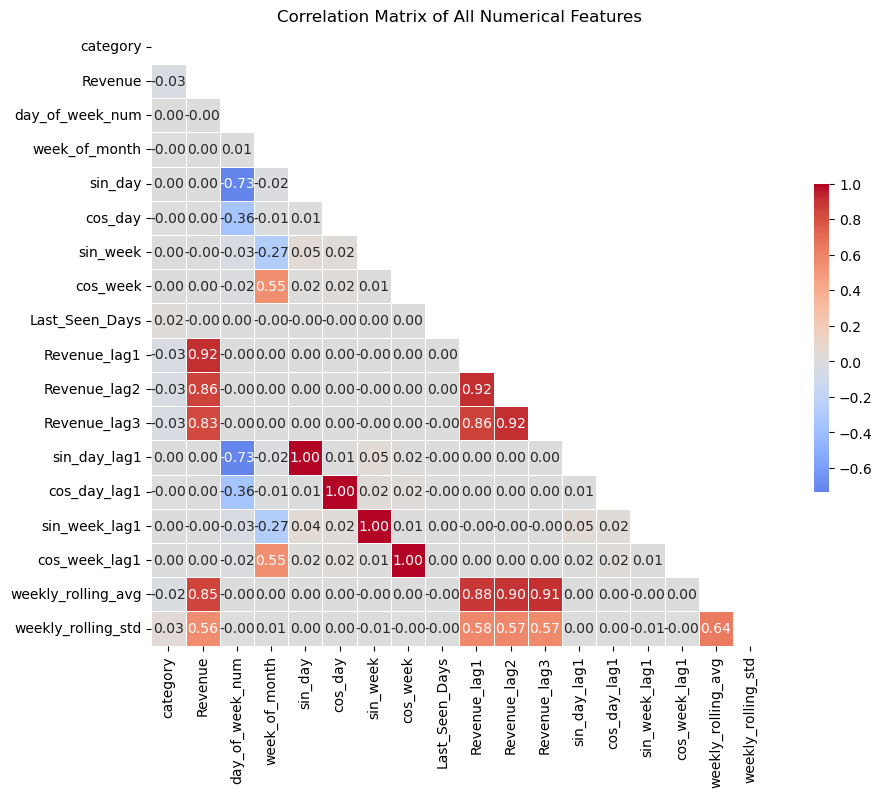

In [8]:
# Compute the correlation matrix for all columns except 'date' as it's datetime
numerical_aldiSub_data = aldiSub_data.select_dtypes(include=[np.number])
corr = numerical_aldiSub_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title and format axes
plt.title('Correlation Matrix of All Numerical Features')
plt.yticks(rotation=0)

# Show plot
plt.show()

In [9]:
# This function is used to reduce memory of a pandas dataframe
# The idea is cast the numeric type to another more memory-effective type
# For ex: Features "age" should only need type='np.int8'
# Source: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [10]:
reduced_aldi = reduce_mem_usage(aldiSub_data)
reduced_aldi.head()

Memory usage of dataframe is 916.91 MB
Memory usage after optimization is: 280.80 MB
Decreased by 69.4%


,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days,Revenue_lag1,Revenue_lag2,Revenue_lag3,sin_day_lag1,cos_day_lag1,sin_week_lag1,cos_week_lag1,weekly_rolling_avg,weekly_rolling_std
0,2024-04-13,19,18.546875,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,2024-04-13,19,21.625000,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,18.546875,0.000000,0.000000,-0.975098,-0.222534,0.0,-1.0,18.546875,0.000000
2,2024-04-13,19,21.625000,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,21.625000,18.546875,0.000000,-0.975098,-0.222534,0.0,-1.0,20.078125,2.185547
3,2024-04-13,19,15.453125,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,21.625000,21.625000,18.546875,-0.975098,-0.222534,0.0,-1.0,20.593750,1.784180
4,2024-04-13,19,21.625000,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,15.453125,21.625000,21.625000,-0.975098,-0.222534,0.0,-1.0,19.312500,2.958984


In [11]:
'''
# Sample 10% of the data without replacement for the sampled data
sampled_df = reduced_aldi.sample(frac=0.1, random_state=42)

# Get the indices of the sampled data
sampled_indices = sampled_df.index

# Display the size of the original and sampled dataframes
print(f"Original Data Size: {len(reduced_aldi)}")
print(f"Sampled Data Size: {len(sampled_df)}")
'''

'\n# Sample 10% of the data without replacement for the sampled data\nsampled_df = reduced_aldi.sample(frac=0.1, random_state=42)\n\n# Get the indices of the sampled data\nsampled_indices = sampled_df.index\n\n# Display the size of the original and sampled dataframes\nprint(f"Original Data Size: {len(reduced_aldi)}")\nprint(f"Sampled Data Size: {len(sampled_df)}")\n'

In [12]:
'''
#Get the indices of the sampled data
sampled_indices = sampled_df.index

# Drop these indices from the original dataframe to create the test set
test_set_df = reduced_aldi.drop(sampled_indices)

# show the size of the test set
print(f"Test set data size: {len(test_set_df)}")
'''

'\n#Get the indices of the sampled data\nsampled_indices = sampled_df.index\n\n# Drop these indices from the original dataframe to create the test set\ntest_set_df = reduced_aldi.drop(sampled_indices)\n\n# show the size of the test set\nprint(f"Test set data size: {len(test_set_df)}")\n'

In [13]:
'''
# Save the sampled DataFrame to a CSV file
sampled_df.to_csv('datasets/sampled_test_datasets/sampled_data_aldi.csv', index=False)

# Save the test set DataFrame to a CSV file
test_set_df.to_csv('datasets/sampled_test_datasets/test_set_data_aldi.csv', index=False)
'''

"\n# Save the sampled DataFrame to a CSV file\nsampled_df.to_csv('datasets/sampled_test_datasets/sampled_data_aldi.csv', index=False)\n\n# Save the test set DataFrame to a CSV file\ntest_set_df.to_csv('datasets/sampled_test_datasets/test_set_data_aldi.csv', index=False)\n"

In [14]:
from sklearn.model_selection import train_test_split

# Load data
train_data = pd.read_csv('datasets/sampled_test_datasets/sampled_data_aldi.csv')
test_data = pd.read_csv('datasets/sampled_test_datasets/test_set_data_aldi.csv')

# Ensure 'date' is a datetime object
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Separate features and target
X_train_full = train_data.drop(['Revenue'], axis=1)
y_train_full = train_data['Revenue']
X_test = test_data.drop(['Revenue'], axis=1)
y_test = test_data['Revenue']

# Splitting training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


In [18]:
X_train_full.head()

,category,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days,Revenue_lag1,Revenue_lag2,...,cos_day_lag1,sin_week_lag1,cos_week_lag1,weekly_rolling_avg,weekly_rolling_std,year,month,day,weekday,weekofyear
0,1,6,3,-0.7817,0.6235,-1.0,-0.0,0.0,6.23,5.34,...,0.6235,-1.0,-0.0,5.977,0.4343,2024,3,17,6,11
1,4,2,3,0.9750,-0.2225,-1.0,-0.0,0.0,5.53,5.53,...,-0.2225,-1.0,-0.0,5.080,0.6216,2024,1,17,2,3
2,3,2,3,0.9750,-0.2225,-1.0,-0.0,0.0,5.82,6.79,...,-0.2225,-1.0,-0.0,6.234,0.7630,2024,1,17,2,3
3,1,4,2,-0.4338,-0.9010,0.0,-1.0,0.0,5.95,5.95,...,-0.9010,0.0,-1.0,5.586,0.6690,2024,2,9,4,6
4,6,0,4,0.0000,1.0000,-0.0,1.0,0.0,13.14,10.95,...,1.0000,-0.0,1.0,13.450,1.9710,2024,3,25,0,13


In [20]:
# Continue with your data splitting and model training
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [21]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600903 entries, 0 to 600902
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   category            600903 non-null  int64  
 1   day_of_week_num     600903 non-null  int64  
 2   week_of_month       600903 non-null  int64  
 3   sin_day             600903 non-null  float64
 4   cos_day             600903 non-null  float64
 5   sin_week            600903 non-null  float64
 6   cos_week            600903 non-null  float64
 7   Last_Seen_Days      600903 non-null  float64
 8   Revenue_lag1        600903 non-null  float64
 9   Revenue_lag2        600903 non-null  float64
 10  Revenue_lag3        600903 non-null  float64
 11  sin_day_lag1        600903 non-null  float64
 12  cos_day_lag1        600903 non-null  float64
 13  sin_week_lag1       600903 non-null  float64
 14  cos_week_lag1       600903 non-null  float64
 15  weekly_rolling_avg  600903 non-nul

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Validate the model
y_pred_val = lin_reg.predict(X_val)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

Validation RMSE: 5.366448545406709
Validation MAE: 2.428748945750364
Validation R^2: 0.8468589040337984


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, 
                               random_state=42)
rf_reg.fit(X_train, y_train)

# Validate the model
y_pred_val = rf_reg.predict(X_val)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

Validation RMSE: 3.5315196234676187
Validation MAE: 1.0973537543286869
Validation R^2: 0.9336805281048967


## XGBoost

In [24]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, 
                             learning_rate=0.1, 
                             random_state=42)
xgb_model.fit(X_train, y_train)

# Validate the model
y_pred_val = xgb_model.predict(X_val)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

Validation RMSE: 4.504371348970686
Validation MAE: 1.8777479051768562
Validation R^2: 0.8921087595332442


## ANN

In [25]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize and train the ANN model
ann_model = Sequential()
ann_model.add(Dense(128, activation='relu', 
                    input_dim=X_train.shape[1]))
ann_model.add(Dense(1))
ann_model.compile(optimizer='adam', 
                  loss='mean_squared_error')

# Fit model
ann_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

# Validate the model
y_pred_val = ann_model.predict(X_val)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

Epoch 1/20


/Users/sowmyamaddali/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15023/15023 - 3s - 186us/step - loss: 35.9009
Epoch 2/20
15023/15023 - 3s - 175us/step - loss: 32.2163
Epoch 3/20
15023/15023 - 3s - 175us/step - loss: 30.3632
Epoch 4/20
15023/15023 - 3s - 176us/step - loss: 28.8167
Epoch 5/20
15023/15023 - 3s - 171us/step - loss: 28.0650
Epoch 6/20
15023/15023 - 3s - 170us/step - loss: 27.8820
Epoch 7/20
15023/15023 - 3s - 168us/step - loss: 26.3788
Epoch 8/20
15023/15023 - 3s - 170us/step - loss: 25.8463
Epoch 9/20
15023/15023 - 3s - 170us/step - loss: 25.7126
Epoch 10/20
15023/15023 - 3s - 170us/step - loss: 26.6893
Epoch 11/20
15023/15023 - 3s - 170us/step - loss: 25.1738
Epoch 12/20
15023/15023 - 3s - 170us/step - loss: 26.9379
Epoch 13/20
15023/15023 - 3s - 171us/step - loss: 24.4578
Epoch 14/20
15023/15023 - 3s - 170us/step - loss: 24.8397
Epoch 15/20
15023/15023 - 3s - 171us/step - loss: 24.0409
Epoch 16/20
15023/15023 - 3s - 170us/step - loss: 25.5498
Epoch 17/20
15023/15023 - 3s - 170us/step - loss: 23.8009
Epoch 18/20
15023/15023 - 3s - 170

## LSTM

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Convert all data to float to prevent type issues with TensorFlow/Keras
X_train_full = X_train_full.astype(float)
X_test = X_test.astype(float)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.2, random_state=42)

# Reshape X for LSTM input [samples, time steps, features]
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential([
    LSTM(50, input_shape=(1, X_train.shape[1]), return_sequences=True),
    LSTM(50, return_sequences=False),
    Dense(1)
])
model.compile(loss='mean_squared_error', 
              optimizer='adam')

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

# Fit the model to the training data with early stopping
model.fit(X_train_reshaped, y_train, 
          epochs=35, batch_size=72, 
          validation_data=(X_val_reshaped, y_val), 
          verbose=2, callbacks=[early_stopping])

# Predict using the test set to evaluate the model
y_test_pred = model.predict(X_test_reshaped)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

Epoch 1/35


/Users/sowmyamaddali/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6677/6677 - 5s - 780us/step - loss: 94.5496 - val_loss: 46.6073
Epoch 2/35
6677/6677 - 5s - 678us/step - loss: 53.0305 - val_loss: 37.5998
Epoch 3/35
6677/6677 - 5s - 682us/step - loss: 49.8095 - val_loss: 35.3118
Epoch 4/35
6677/6677 - 5s - 676us/step - loss: 47.6291 - val_loss: 36.3884
Epoch 5/35
6677/6677 - 5s - 677us/step - loss: 47.4135 - val_loss: 34.6719
Epoch 6/35
6677/6677 - 5s - 679us/step - loss: 46.5428 - val_loss: 32.8470
Epoch 7/35
6677/6677 - 5s - 683us/step - loss: 46.4470 - val_loss: 34.6288
Epoch 8/35
6677/6677 - 5s - 679us/step - loss: 46.5696 - val_loss: 33.9821
Epoch 9/35
6677/6677 - 5s - 678us/step - loss: 46.6940 - val_loss: 33.9697
Epoch 10/35
6677/6677 - 5s - 679us/step - loss: 45.9833 - val_loss: 31.2111
Epoch 11/35
6677/6677 - 5s - 678us/step - loss: 45.1365 - val_loss: 37.7940
Epoch 12/35
6677/6677 - 5s - 681us/step - loss: 44.2617 - val_loss: 29.6255
Epoch 13/35
6677/6677 - 5s - 679us/step - loss: 43.7858 - val_loss: 33.2600
Epoch 14/35
6677/6677 - 5s - 677

## For the test set

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_test, y_test):
    # Making predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculating the metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R^2: {r2}")

# Assuming models are named as lin_reg, rf_reg, xgb_model, lstm_model, ann_model

# Evaluate Linear Regression
print("Linear Regression Results:")
evaluate_model(lin_reg, X_test, y_test)

# Evaluate Random Forest
print("Random Forest Results:")
evaluate_model(rf_reg, X_test, y_test)

# Evaluate XGBoost
print("XGBoost Results:")
evaluate_model(xgb_model, X_test, y_test)

# Evaluate ANN
print("ANN Results:")
evaluate_model(ann_model, X_test, y_test)

# Evaluate LSTM
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
print("LSTM Results:")
evaluate_model(model, X_test_reshaped, y_test) 

Linear Regression Results:
RMSE: 5.448977542308082
MAE: 2.413230656048466
R^2: 0.8509512455017705
Random Forest Results:
RMSE: 3.8828120645747135
MAE: 1.0823938688376966
R^2: 0.9243182691157705
XGBoost Results:
RMSE: 5.132554452252839
MAE: 1.8632803142933916
R^2: 0.8677592065168964
ANN Results:
169005/169005 ━━━━━━━━━━━━━━━━━━━━ 27s 157us/step
RMSE: 5.068184450114642
MAE: 2.1677678320671396
R^2: 0.8710554058743357
LSTM Results:
169005/169005 ━━━━━━━━━━━━━━━━━━━━ 38s 227us/step
RMSE: 6.396443298232461
MAE: 2.6675174087963236
R^2: 0.7946118306002113
